# Importing Library

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [120]:
pd.set_option('display.max_columns',0)
df=pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
df.shape

(7043, 21)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation

1-- No null value Present in out dataset

2--TotalCharges should be float data type but it is given as object data type.

In [123]:
df.drop('customerID',axis=1,inplace=True)

In [124]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [125]:
df['TotalCharges']=df['TotalCharges'].replace(' ',0)

In [126]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [91]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

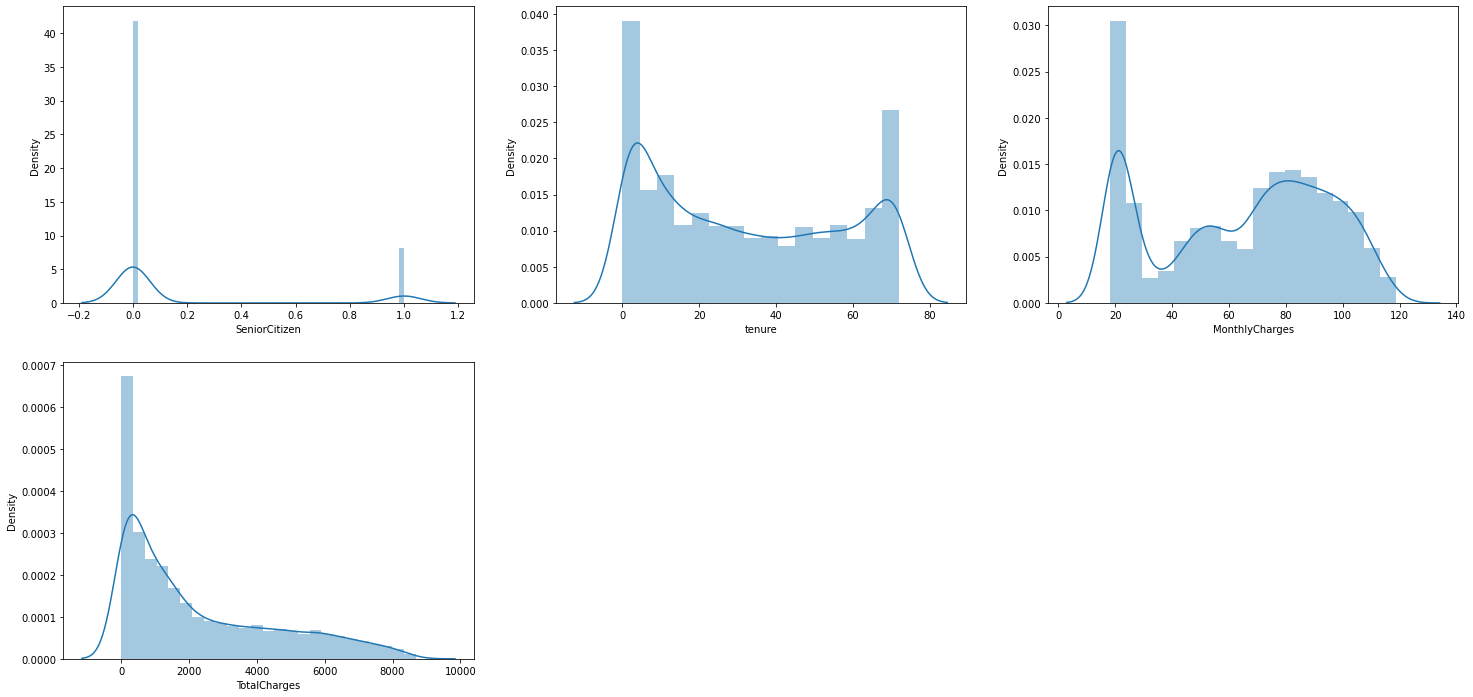

In [141]:
plt.figure(figsize=(25,12))
plot=1
for i in df:
    if plot<=6:
        if df[i].dtype!='object':
            ax=plt.subplot(2,3,plot)
            sns.distplot(df[i])
            plot=plot+1  
plt.show()

<AxesSubplot:title={'center':'Churn as per Gender'}, xlabel='gender', ylabel='count'>

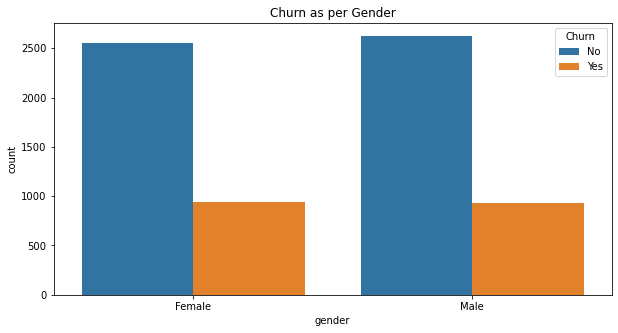

In [149]:
plt.figure(figsize=(10,5))
plt.title('Churn as per Gender',fontsize=12)
sns.countplot(x=df['gender'],hue='Churn',data=df)

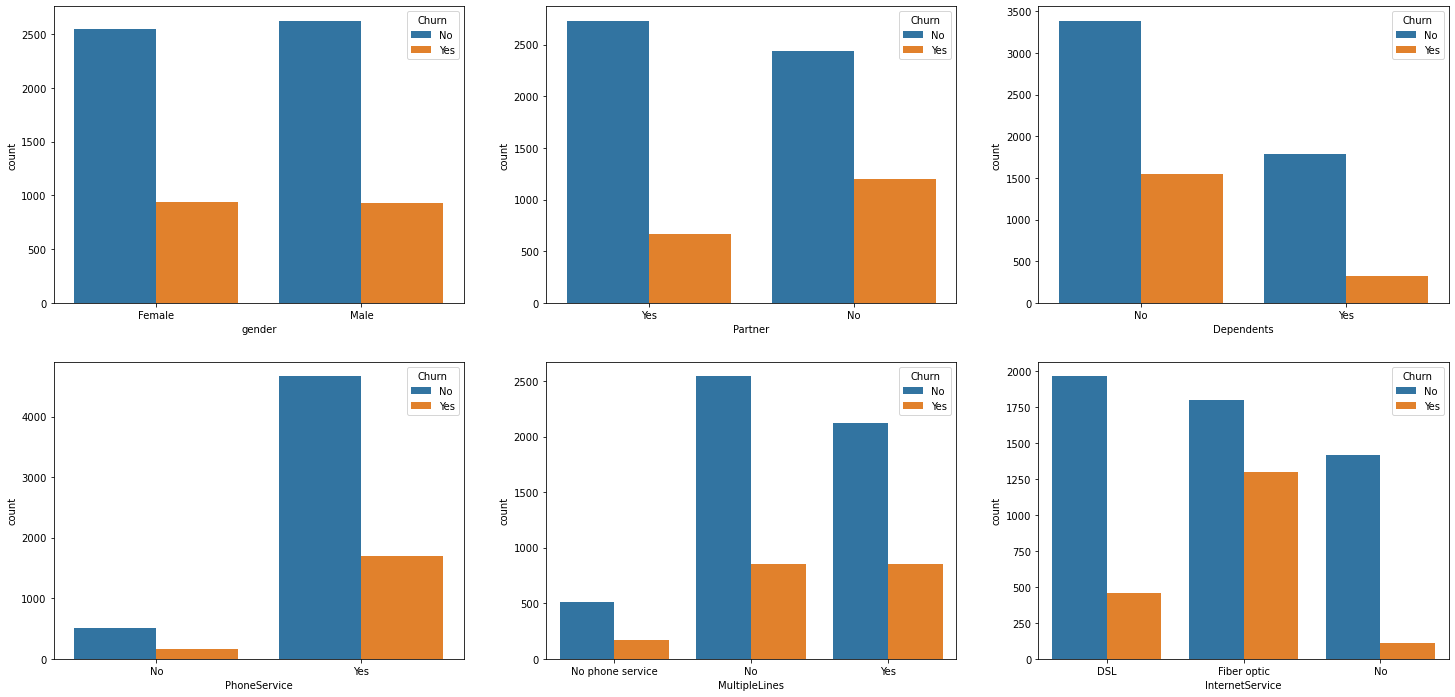

In [152]:
plt.figure(figsize=(25,12))
plot=1
for i in df[:-1]:
    if plot<=6:
        if df[i].dtype=='object':
            ax=plt.subplot(2,3,plot)
            sns.countplot(df[i],hue='Churn',data=df)
            plt.xlabel(i,fontsize=10)
            plot=plot+1  
plt.show()

In [153]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)
        print(df[i].value_counts())
        print('---'*20)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-----

In [154]:
df=df.replace('No internet service','No')
df=df.replace('No phone service','No')


In [155]:
df=df.replace({'Yes':1,'No':0})
df=df.replace({'Male':1,'Female':0})
df=df.replace({'One year':1,'Two year':2,'Month-to-month':0})
df=df.replace({'Fiber optic':1,'DSL':2,'No':0})
df=df.replace({'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3,'Credit card (automatic)':4})

In [156]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,2,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,2,1,0,1,1,0,0,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [165]:
x=df.drop('Churn',axis=1)
y=df['Churn']

# Train_test_split

In [197]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=422)

In [199]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5282, 19), (5282,), (1761, 19), (1761,))

# Model Building

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [214]:
def model(algo):
    algo.fit(x_train,y_train)
    algo.fit(x_test,y_test)
    print('Training of Test data:',algo.score(x_test,y_test))
    pred=algo.predict(x_test)
    print('Accuracy_score:',accuracy_score(y_test,pred))
    print('Confusion Matrix:',confusion_matrix(y_test,pred))
    print('Classification report:',classification_report(y_test,pred))

In [215]:
## Logistic Regression
model(LogisticRegression())

Training of Test data: 0.8154457694491766
Accuracy_score: 0.8154457694491766
Confusion Matrix: [[1166  123]
 [ 202  270]]
Classification report:               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1289
           1       0.69      0.57      0.62       472

    accuracy                           0.82      1761
   macro avg       0.77      0.74      0.75      1761
weighted avg       0.81      0.82      0.81      1761



In [216]:
##Decision Tree
model(DecisionTreeClassifier(criterion='gini'))

Training of Test data: 0.9988642816581488
Accuracy_score: 0.9988642816581488
Confusion Matrix: [[1288    1]
 [   1  471]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1289
           1       1.00      1.00      1.00       472

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761



In [217]:
## Knn
model(KNeighborsClassifier(n_neighbors=11))

Training of Test data: 0.7955706984667802
Accuracy_score: 0.7955706984667802
Confusion Matrix: [[1200   89]
 [ 271  201]]
Classification report:               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1289
           1       0.69      0.43      0.53       472

    accuracy                           0.80      1761
   macro avg       0.75      0.68      0.70      1761
weighted avg       0.78      0.80      0.78      1761



In [218]:
##Naive Bayes
model(GaussianNB())

Training of Test data: 0.7649063032367973
Accuracy_score: 0.7649063032367973
Confusion Matrix: [[991 298]
 [116 356]]
Classification report:               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1289
           1       0.54      0.75      0.63       472

    accuracy                           0.76      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.80      0.76      0.77      1761



In [220]:
## SVC
model(SVC())

Training of Test data: 0.7319704713231119
Accuracy_score: 0.7319704713231119
Confusion Matrix: [[1289    0]
 [ 472    0]]
Classification report:               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1289
           1       0.00      0.00      0.00       472

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.73      0.62      1761



In [221]:
## Random forest
model(RandomForestClassifier())

Training of Test data: 0.9988642816581488
Accuracy_score: 0.9988642816581488
Confusion Matrix: [[1287    2]
 [   0  472]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1289
           1       1.00      1.00      1.00       472

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761



# cross validation score

Cross_validation_score: [0.79432624 0.80992908 0.79858156 0.79829545 0.78267045 0.74857955
 0.82386364 0.79261364 0.79829545 0.79403409]
Avg of Cross_val_score: 0.7941189152159895


<AxesSubplot:ylabel='Density'>

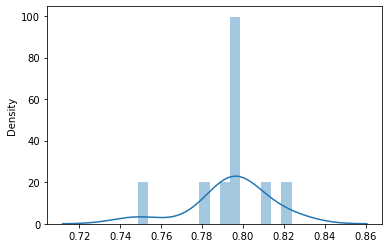

In [225]:
## Random Forest Cross validation
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(RandomForestClassifier(),x,y,cv=10)
print('Cross_validation_score:',cross_validation)
print('Avg of Cross_val_score:',cross_validation.mean())
sns.distplot(cross_validation)

Cross_validation_score: [0.80141844 0.80992908 0.80992908 0.81676136 0.79403409 0.78835227
 0.81534091 0.80965909 0.796875   0.80965909]
Avg of Cross_val_score: 0.8051958413926499


<AxesSubplot:ylabel='Density'>

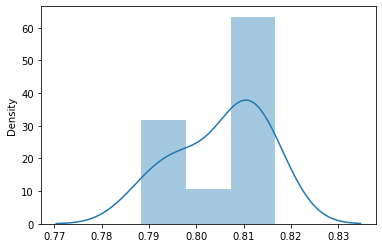

In [226]:
## Logistic Regression
cross_validation=cross_val_score(LogisticRegression(),x,y,cv=10)
print('Cross_validation_score:',cross_validation)
print('Avg of Cross_val_score:',cross_validation.mean())
sns.distplot(cross_validation)

Cross_validation_score: [0.7248227  0.75319149 0.74326241 0.74289773 0.71448864 0.71732955
 0.72159091 0.70596591 0.72301136 0.734375  ]
Avg of Cross_val_score: 0.7280935686653771


<AxesSubplot:ylabel='Density'>

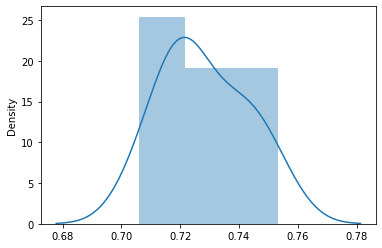

In [227]:
## Decision Tree
cross_validation=cross_val_score(DecisionTreeClassifier(),x,y,cv=10)
print('Cross_validation_score:',cross_validation)
print('Avg of Cross_val_score:',cross_validation.mean())
sns.distplot(cross_validation)

# Saving the Model

In [246]:
import pickle
file='churnRf.pkl'
pickle.dump(RandomForestClassifier(),open(file,'wb'))